<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/course1_1_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
import random
import tqdm
from pathlib import Path

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
weight = 0.25
bias = 0.6

X = torch.arange(0, 1, 0.01)
y = weight * X + bias

In [ ]:
X,y

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
         0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
         0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
         0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
         0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
         0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
         0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
         0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
         0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
         0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
         0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
         0.9900]),
 tensor([0.6000, 0.6025, 0.6050, 0.6075, 0.6100, 0.6125, 0.6150, 0.6175, 0.6200,
         

In [ ]:
X.shape, y.shape

(torch.Size([100]), torch.Size([100]))

In [ ]:
train_size = int(len(X)*0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_train, y_train

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
         0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
         0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
         0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
         0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
         0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
         0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
         0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
         0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900]),
 tensor([0.6000, 0.6025, 0.6050, 0.6075, 0.6100, 0.6125, 0.6150, 0.6175, 0.6200,
         0.6225, 0.6250, 0.6275, 0.6300, 0.6325, 0.6350, 0.6375, 0.6400, 0.6425,
         0.6450, 0.6475, 0.6500, 0.6525, 0.6550, 0.6575, 0.6600, 0.6625, 0.6650,
         0.6675, 0.6700, 0.6725, 0

In [ ]:
X_test = X[train_size:]
y_test = y[train_size:]
X_test, y_test

(tensor([0.8000, 0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800,
         0.8900, 0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700,
         0.9800, 0.9900]),
 tensor([0.8000, 0.8025, 0.8050, 0.8075, 0.8100, 0.8125, 0.8150, 0.8175, 0.8200,
         0.8225, 0.8250, 0.8275, 0.8300, 0.8325, 0.8350, 0.8375, 0.8400, 0.8425,
         0.8450, 0.8475]))

In [ ]:
def visualize(xtrain = X_train, ytrain = y_train, xtest = X_test, ytest = y_test, prediction = None):
    plt.scatter(xtrain, ytrain, c = 'b', s = 3, label = 'Train')


    plt.scatter(xtest, ytest, c = 'g', s = 3, label = 'Test')

    if prediction != None:
        plt.scatter(xtest, prediction, c = 'r', s = 3, label = 'Prediction')

    plt.legend(prop = {'size': 16})

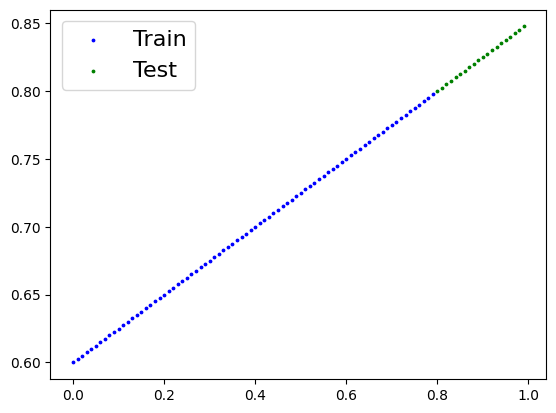

In [ ]:
visualize()

In [ ]:
class LinearRegression (nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1),
                                    requires_grad=True,
                                    )
        self.bias = nn.Parameter(torch.randn(1),
                                    requires_grad=True,
                                    )
    def forward(self, x: torch.Tensor):
        return self.weights * x + self.bias

In [ ]:
model_0 = LinearRegression()
print(model_0.state_dict())
print(weight, bias)

OrderedDict([('weights', tensor([-1.0157])), ('bias', tensor([-0.8887]))])
0.25 0.6


In [ ]:
with torch.inference_mode():
    prediction = model_0(X_test)
prediction.unsqueeze(dim = 1), y_test.unsqueeze(dim = 1)

(tensor([[-1.7013],
         [-1.7114],
         [-1.7216],
         [-1.7318],
         [-1.7419],
         [-1.7521],
         [-1.7622],
         [-1.7724],
         [-1.7825],
         [-1.7927],
         [-1.8029],
         [-1.8130],
         [-1.8232],
         [-1.8333],
         [-1.8435],
         [-1.8536],
         [-1.8638],
         [-1.8740],
         [-1.8841],
         [-1.8943]]),
 tensor([[0.8000],
         [0.8025],
         [0.8050],
         [0.8075],
         [0.8100],
         [0.8125],
         [0.8150],
         [0.8175],
         [0.8200],
         [0.8225],
         [0.8250],
         [0.8275],
         [0.8300],
         [0.8325],
         [0.8350],
         [0.8375],
         [0.8400],
         [0.8425],
         [0.8450],
         [0.8475]]))

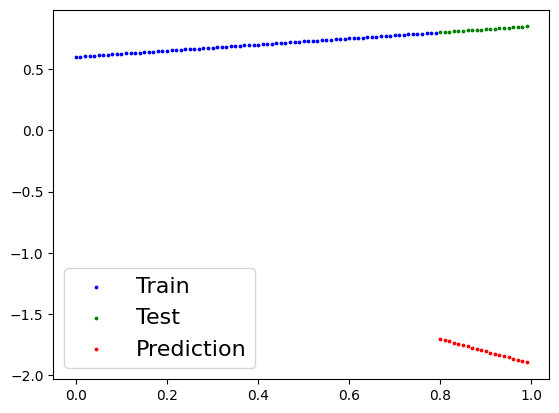

In [ ]:
visualize(prediction = prediction)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.005)

In [ ]:
# Train loop
torch.manual_seed(42)

epoch_arr = []
loss_arr = []
test_loss_arr = []

epochs = 1000


for epoch in tqdm.tqdm(range(epochs)):



    #train part
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # test part


    if epoch % 10 == 0:

        model_0.eval()

        with torch.inference_mode():
            y_pred = model_0(X_test)

        test_loss = loss_fn(y_pred,y_test)

        epoch_arr.append(epoch)
        loss_arr.append(loss)
        test_loss_arr.append(test_loss)

        print(f'epoch: {epoch}, parameters: {model_0.state_dict()}')






 29%|██▉       | 289/1000 [00:00<00:00, 1443.29it/s]

epoch: 0, parameters: OrderedDict([('weights', tensor([-1.0137])), ('bias', tensor([-0.8837]))])
epoch: 10, parameters: OrderedDict([('weights', tensor([-0.9939])), ('bias', tensor([-0.8337]))])
epoch: 20, parameters: OrderedDict([('weights', tensor([-0.9742])), ('bias', tensor([-0.7837]))])
epoch: 30, parameters: OrderedDict([('weights', tensor([-0.9544])), ('bias', tensor([-0.7337]))])
epoch: 40, parameters: OrderedDict([('weights', tensor([-0.9347])), ('bias', tensor([-0.6837]))])
epoch: 50, parameters: OrderedDict([('weights', tensor([-0.9149])), ('bias', tensor([-0.6337]))])
epoch: 60, parameters: OrderedDict([('weights', tensor([-0.8952])), ('bias', tensor([-0.5837]))])
epoch: 70, parameters: OrderedDict([('weights', tensor([-0.8754])), ('bias', tensor([-0.5337]))])
epoch: 80, parameters: OrderedDict([('weights', tensor([-0.8557])), ('bias', tensor([-0.4837]))])
epoch: 90, parameters: OrderedDict([('weights', tensor([-0.8359])), ('bias', tensor([-0.4337]))])
epoch: 100, parameter

 59%|█████▉    | 593/1000 [00:00<00:00, 1491.17it/s]

epoch: 290, parameters: OrderedDict([('weights', tensor([-0.4409])), ('bias', tensor([0.5663]))])
epoch: 300, parameters: OrderedDict([('weights', tensor([-0.4212])), ('bias', tensor([0.6158]))])
epoch: 310, parameters: OrderedDict([('weights', tensor([-0.4017])), ('bias', tensor([0.6583]))])
epoch: 320, parameters: OrderedDict([('weights', tensor([-0.3828])), ('bias', tensor([0.6931]))])
epoch: 330, parameters: OrderedDict([('weights', tensor([-0.3648])), ('bias', tensor([0.7213]))])
epoch: 340, parameters: OrderedDict([('weights', tensor([-0.3480])), ('bias', tensor([0.7435]))])
epoch: 350, parameters: OrderedDict([('weights', tensor([-0.3324])), ('bias', tensor([0.7609]))])
epoch: 360, parameters: OrderedDict([('weights', tensor([-0.3179])), ('bias', tensor([0.7740]))])
epoch: 370, parameters: OrderedDict([('weights', tensor([-0.3044])), ('bias', tensor([0.7838]))])
epoch: 380, parameters: OrderedDict([('weights', tensor([-0.2919])), ('bias', tensor([0.7906]))])
epoch: 390, paramete

 90%|█████████ | 902/1000 [00:00<00:00, 1518.08it/s]

epoch: 600, parameters: OrderedDict([('weights', tensor([-0.0914])), ('bias', tensor([0.7435]))])
epoch: 610, parameters: OrderedDict([('weights', tensor([-0.0829])), ('bias', tensor([0.7399]))])
epoch: 620, parameters: OrderedDict([('weights', tensor([-0.0744])), ('bias', tensor([0.7363]))])
epoch: 630, parameters: OrderedDict([('weights', tensor([-0.0658])), ('bias', tensor([0.7328]))])
epoch: 640, parameters: OrderedDict([('weights', tensor([-0.0573])), ('bias', tensor([0.7291]))])
epoch: 650, parameters: OrderedDict([('weights', tensor([-0.0488])), ('bias', tensor([0.7255]))])
epoch: 660, parameters: OrderedDict([('weights', tensor([-0.0402])), ('bias', tensor([0.7220]))])
epoch: 670, parameters: OrderedDict([('weights', tensor([-0.0317])), ('bias', tensor([0.7184]))])
epoch: 680, parameters: OrderedDict([('weights', tensor([-0.0232])), ('bias', tensor([0.7148]))])
epoch: 690, parameters: OrderedDict([('weights', tensor([-0.0146])), ('bias', tensor([0.7111]))])
epoch: 700, paramete

100%|██████████| 1000/1000 [00:00<00:00, 1485.66it/s]

epoch: 920, parameters: OrderedDict([('weights', tensor([0.1816])), ('bias', tensor([0.6288]))])
epoch: 930, parameters: OrderedDict([('weights', tensor([0.1901])), ('bias', tensor([0.6251]))])
epoch: 940, parameters: OrderedDict([('weights', tensor([0.1987])), ('bias', tensor([0.6216]))])
epoch: 950, parameters: OrderedDict([('weights', tensor([0.2072])), ('bias', tensor([0.6180]))])
epoch: 960, parameters: OrderedDict([('weights', tensor([0.2157])), ('bias', tensor([0.6144]))])
epoch: 970, parameters: OrderedDict([('weights', tensor([0.2243])), ('bias', tensor([0.6109]))])
epoch: 980, parameters: OrderedDict([('weights', tensor([0.2328])), ('bias', tensor([0.6073]))])
epoch: 990, parameters: OrderedDict([('weights', tensor([0.2413])), ('bias', tensor([0.6036]))])


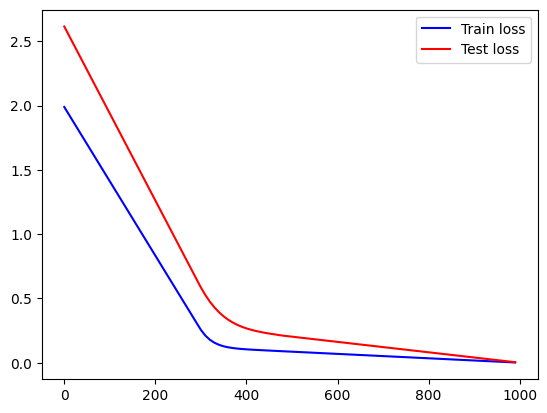

In [ ]:
plt.plot(np.array(epoch_arr), np.array(torch.tensor(loss_arr)), c = 'b', label = 'Train loss')
plt.plot(np.array(epoch_arr), np.array(torch.tensor(test_loss_arr)), c = 'r', label = 'Test loss')
#plt.title('Train and Test loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
plt.legend()

In [ ]:
with torch.inference_mode():
    y_pred = model_0(X_test)
y_pred

tensor([0.8004, 0.8029, 0.8054, 0.8078, 0.8103, 0.8128, 0.8153, 0.8177, 0.8202,
        0.8227, 0.8252, 0.8277, 0.8301, 0.8326, 0.8351, 0.8376, 0.8400, 0.8425,
        0.8450, 0.8475])

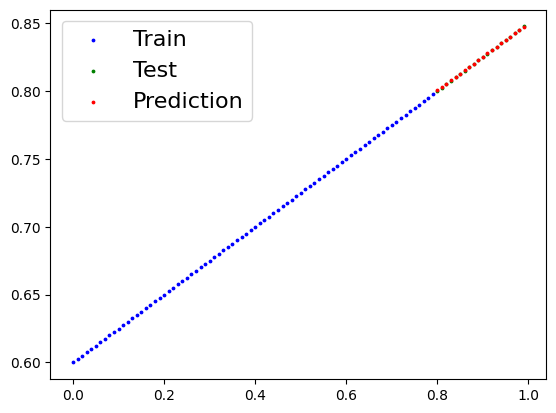

In [ ]:
visualize(prediction = y_pred)

In [ ]:
DIRPATH = Path('models')
DIRPATH.mkdir(parents=True, exist_ok=True)
FILE_NAME = 'course1_workflow_linear_regression.pth'
FILE_PATH = DIRPATH / FILE_NAME
torch.save(obj=model_0.state_dict(), f=FILE_PATH)

In [ ]:
loaded_model = LinearRegression()

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([1.3221])), ('bias', tensor([0.8172]))])

In [ ]:
loaded_model.load_state_dict(torch.load(f=FILE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.2477])), ('bias', tensor([0.6023]))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
    load_pred = loaded_model(X_test)

load_pred == y_pred

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])

In [ ]:
tz = torch.randn(2)
tz

tensor([-0.0499,  0.5263])

In [ ]:
def fn (arr = tz):
    print(arr)

In [ ]:
tz = torch.arange(5.0, 1.0, -0.2)

In [ ]:
fn(tz)

tensor([1.0000, 1.2000, 1.4000, 1.6000, 1.8000, 2.0000, 2.2000, 2.4000, 2.6000,
        2.8000, 3.0000, 3.2000, 3.4000, 3.6000, 3.8000, 4.0000, 4.2000, 4.4000,
        4.6000, 4.8000, 5.0000, 5.2000, 5.4000, 5.6000, 5.8000, 6.0000, 6.2000,
        6.4000, 6.6000, 6.8000, 7.0000, 7.2000, 7.4000, 7.6000, 7.8000, 8.0000,
        8.2000, 8.4000, 8.6000, 8.8000, 9.0000, 9.2000, 9.4000, 9.6000, 9.8000])


In [ ]:
tz = torch.arange(1.0, 10.0, 0.2)

In [ ]:
fn()

tensor([-0.0499,  0.5263])
